# Chapter 7 - The Normal Distribution
Solutions for all exercises listed in Chapter 7 of *Principles of Statistics* (MG Bulmer, 1965)


---


Set local environment

In [1]:
# Import libraries
import numpy as np
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define function that standardizes an input
def standardize(x=0, mean=0, var=None, sdev=None):
  if var is not None:
    return (x - mean) / sqrt(var)
  if sdev is not None:
    return (x - mean) / sdev

## Exercise 7.1

IQ is approximately normally distributed with mean 100 and a standard deviation of 16.

To model this, let $X$ be a random variable such taht $X \sim N(100, 16^{2})$

a) Probability that X < 90

In [2]:
round(norm.cdf(standardize(x=90, mean=100, sdev=16)), 3)

0.266

b) Probability that X > 130

In [3]:
round(1 - norm.cdf(standardize(x=130, mean=100, sdev=16)), 2)

0.03

c) Probability that 95 < X < 105

In [4]:
round(norm.cdf(standardize(x=105, mean=100, sdev=16)) - norm.cdf(standardize(x=95, mean=100, sdev=16)), 3)

0.245

## **Exercise 7.2**
a) What is the probability that the mean IQ of a randomly chosen group of 12 people will lie between 95 and 105?

**Solution**

We know that $\bar{X} \sim N(100, \frac{16^2}{12})$

In [5]:
print(round(norm.cdf(standardize(x=105, mean=100, var=16**2/12)) - norm.cdf(standardize(x=95, mean=100, var=16**2/12)), 3))

0.721


b) How large a sample is required to have a chance of 95% that the mean IQ of this group will lie between these limits?

*We are looking for $n^*$ such that $\Phi(\frac{105 - 100}{\frac{16}{\sqrt{n^*}}}) -  \Phi(\frac{95 - 100}{\frac{16}{\sqrt{n^*}}}) = 0.95$*

*Note that the LHS of the above equation is equivalent to*

$\Phi(\frac{5}{\frac{16}{\sqrt{n^*}}}) -  \Phi(\frac{-5}{\frac{16}{\sqrt{n^*}}})$

$\Phi(\frac{5}{\frac{16}{\sqrt{n^*}}}) - (1 - \Phi(\frac{5}{\frac{16}{\sqrt{n^*}}}) )$

$2 \Phi(\frac{5}{\frac{16}{\sqrt{n^*}}}) - 1 \stackrel{\text{must}}=0.95$

*Thus*

$\Phi(\frac{5}{\frac{16}{\sqrt{n^*}}}) \stackrel{\text{must}} = \frac{0.95 + 1}{2} = 0.975$

In [6]:
# Find arg where norm.cdf(x) ≈ 0.975
x = 1.9
while round(norm.cdf(x), 3) < 0.975:
  x += 0.01 
# Solve for n
print('n is nearly', round(((16 * x) / 5)**2, 0))

n is nearly 39.0


## **Exercise 7.3**

Fit a normal curve to the observed distribution of head breadths

*X is random variable for head breadth (cm)*

$X \sim N(\mu=15.049, \sigma^2=0.249)$



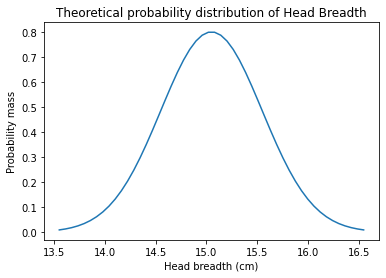

In [7]:
# Declare parameters
mu = 15.049
s2 = 0.249

# Create evenly-split array (±3 standard deviations from the mean)
x = np.linspace(start=mu - 3 * sqrt(s2), stop=mu + 3 * sqrt(s2), num=50, endpoint=True)

# Calculate probability density at each x
Px = norm.pdf(x=x, loc=mu, scale=sqrt(s2))

# Plot pdf
plt.plot(x, Px)
plt.title('Theoretical probability distribution of Head Breadth')
plt.xlabel('Head breadth (cm)')
plt.ylabel('Probability mass')
plt.show()

## **Exercise 7.4**

Find the expected frequencies in the distribution of head breadths (p. 40) on the assumption of normality using the CDF

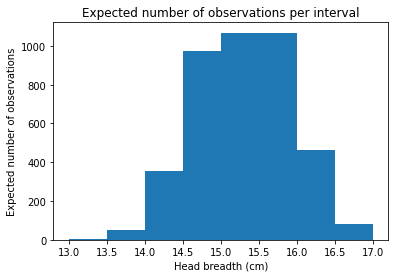

In [8]:
# Number of observations
n = 3000

# Bins (according to book)
x = np.arange(start=13, stop=17, step=0.5)

# Expected number of observations per bin
freq = []
for lower_bound in x[:-1]:
  # Upper bound is the next element
  upper_bound = x[np.argwhere(x == lower_bound).item() + 1]
  # Expected number of observations (n * probability)
  freq.append(n * (norm.cdf(standardize(x=upper_bound, mean=mu, var=s2)) - norm.cdf(standardize(x=lower_bound, mean=mu, var=s2))))

# Plot observed frequencies
plt.bar(x[:-1], freq, width=1, align='edge')
plt.title('Expected number of observations per interval')
plt.xlabel('Head breadth (cm)')
plt.ylabel('Expected number of observations')
plt.show()

## **Exercise 7.5**
From the data in table 13 on p. 113 estimate the proportion of men with heights:

1. More than 1 standard deviation above the mean and compare with a normal


In [9]:
# Declare parameters
mu = 65.535
sd = 2.557

# Print the heights we're looking for
x = mu + sd
print('People taller than', round(x, 0), 'inches.')

People taller than 68.0 inches.


In [10]:
print('Proportion of people taller than', round(x, 0), 'inches:', round((264 + 177 + 97 + 46 + 17 + 7 + 4 + 1) / 3000, 3))
print('Expected proportion according to normal curve:', round(1 - norm.cdf(standardize(x=x, mean=mu, sdev=sd)), 3))

Proportion of people taller than 68.0 inches: 0.204
Expected proportion according to normal curve: 0.159


2. More than 2 standart deviations above the mean and compare with a normal

In [11]:
# Print height we're looking for
x = mu + 2 * sd
print('People taller than', round(x, 0), 'inches.')

People taller than 71.0 inches.


In [12]:
print('Proportion of people taller than', round(x, 0), 'inches:', round((46 + 17 + 7 + 4 + 1) / 3000, 3))
print('Expected proportion according to normal curve:', round(1 - norm.cdf(standardize(x=x, mean=mu, sdev=sd)), 3))

Proportion of people taller than 71.0 inches: 0.025
Expected proportion according to normal curve: 0.023


## **Exercise 7.6**

$X$ is the breaking distance (in yards) that a motorist takes to go from 30 mph down to 0 mph.

$X_A \sim N(\mu=30, \sigma^2=36)$

$X_B \sim N(\mu=40, \sigma^2=64)$

$X_A$ and $X_B$ are independent.

Motorists A and B approach each other at 30mph on a single-lane road and they first see each other when they are 90 yards apart, what is the probability that they avoid collision?

**Solution**

The drivers will avoid collision whenever their aggregate breaking distance is less than 90. Note that:

$Y = X_A + X_B$

$E(Y) = E(X_A) + E(X_B)$

$V(X) = V(X_A) + V(X_B)$

We're therefore looking for $P(Y < 90)$

In [13]:
print("Probability that they won't crash:", round(norm.cdf(standardize(90, mean=30 + 40, var=36 + 64)), 3))

Probability that they won't crash: 0.977


## **Exercise 7.7**

$X$ is the number of fume cupboards needed by a chemist during their shift.

$P(X=0) = 0.6$

$P(X=1) = 0.3$

$P(X=2) = 0.1$

How many cupboards would be required to satisfy a group of 50 chemists at least 95% of the time?

**Solution**

The number of cupboards required by one chemist follows a multinomial distribution. Since $n=50$ and they're all working independently from one another, we can use the normal distribution to approximate chance that the number of cupboards will be greater or equal to the number of cupboards needed 95% of the time.

$E(X) = (0 \times 0.6) + (1 \times 0.3) + (2 \times 0.1) = 0.5$

$V(X) = (0 - 0.5)^2 \times 0.6 + (1 - 0.5)^2 \times 0.3 + (2 - 0.5)^2 \times 0.1 = 0.45$

Let $Y = \sum_{i=1}^{50} X_i$ be the number of cupboards needed by all 50 chemists. Therefore:
 
 $E(Y) = 50 \times E(X)$ and
 
 $V(Y) = 50 \times v(X)$
 
Since $Y$ is a sum of 50 identically and independently ditributed random variables, it follows that $X \sim N(\mu = 25, \sigma^2 = 22.5)$

We are therefore looking for $y^*$ such that $\Phi(\frac{y^* - 25}{\sqrt{22.5}})$ >= 0.95

In [14]:
# Find the argument that accumulates 95% the probabiltiy below it
z = 1.5
while round(norm.cdf(z), 3) < 0.95:
  z += 0.01

# Solve for y*
print('Approximately,', round(z * sqrt(22.5) + 25, 0), 'cupboards are required.')

Approximately, 33.0 cupboards are required.


## Excercise 7.8

1. If the probability of a male birth is $0.514$, what is the probability that there will be fewer boys than girls in 1000 births?

**Solution**

$X \sim B(n=1000, P=0.514)$

$E(X) = n \times P = 514$

$V(X) = n \times P \times (1-P) = 249.804$

A binomial distribution is the sum of $n$ iid Bernoulli variables, so we can use the CLT to approximate the probability that $X \leq 499$

In [15]:
# Set parameters of nomral distribution
n = 1000
P = 0.514
mu = n * P
s2 = n * P * (1 - P)

# Get Prob. with standardized normal
print('Probability that there will be more girls than boys in 1000 births:', round(norm.cdf(standardize(x=499, mean=mu, var=s2)), 3))

Probability that there will be more girls than boys in 1000 births: 0.171


2. How large a sample must be take to make the probability of this occurrence less than 5%?

In [16]:
norm.cdf(-2)

0.022750131948179195

In [17]:
norm.cdf(-1.5)

0.06680720126885807

In [19]:
# Find argument that accumulates 0.05
z = -2
while norm.cdf(z) < 0.05:
  z += 0.01

# Solve for n (naively)